In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Make a pixel panel object

In [2]:
xdim = 32
ydim = 16
panel_xvals=np.append([],[[x for x in range(0,xdim)] for y in range(0,ydim)])
panel_yvals=np.append([],[[y for x in range(0,xdim)] for y in range(0,ydim)])

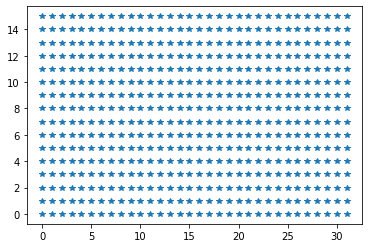

In [3]:
plot(panel_xvals,panel_yvals,"*");

## Test affine transform of panel

In [4]:
def rot_matrix(angle, matrix):
    rot_sin = np.sin(angle*np.pi/180)
    rot_cos = np.cos(angle*np.pi/180)
    rot = np.array([[rot_cos, -rot_sin, 0],
                [rot_sin, rot_cos,  0],
                [0,             0,  1]])
    return rot @ matrix

def trans_matrix(x, y, matrix):
    trans = np.array([[1,   0,   x],
                      [0,   1,   y],
                      [0,   0,   1]])
    return trans @ matrix

In [17]:
panel = np.array([panel_xvals, panel_yvals, np.ones(len(panel_xvals))])

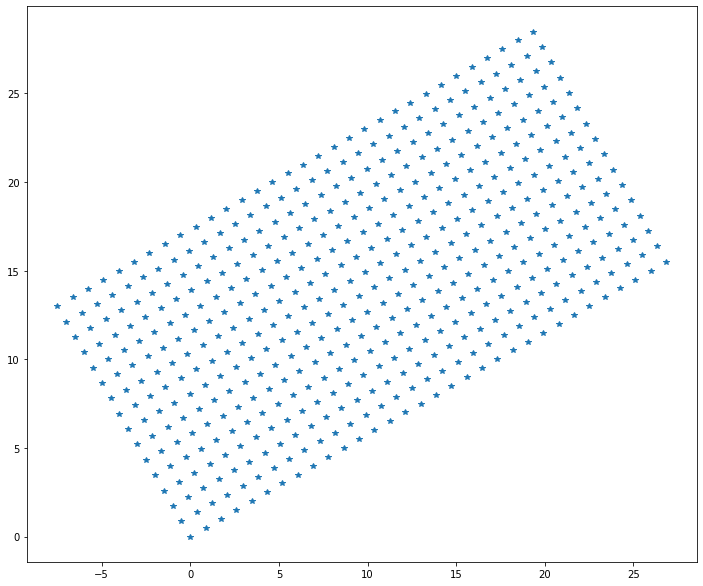

In [19]:
testpanel = rot_matrix(30, panel)
plt.figure(figsize=[12,12])
plt.gca().set_aspect(1.0)
plot(testpanel[0],testpanel[1],"*");

## Generate translated and rotated panels in the form of a C array

In [173]:
panel = np.array([panel_xvals, panel_yvals, np.ones(len(panel_xvals))])

panel_prerot = rot_matrix(62,panel)

panel_trans = trans_matrix(33, 0, panel_prerot)

In [174]:
angles = linspace(0,360,10)[0:-1]
print(angles)

[  0.  40.  80. 120. 160. 200. 240. 280. 320.]


In [175]:
def to_c_array(values, ctype="float", name="table", formatter=str, colcount=8):
    # apply formatting to each element
    values = [formatter(v) for v in values]

    # split into rows with up to `colcount` elements per row
    rows = [values[i:i+colcount] for i in range(0, len(values), colcount)]

    # separate elements with commas, separate rows with newlines
    body = ',\n    '.join([', '.join(r) for r in rows])

    # assemble components into the complete string
    return f'   {{{body}}}'

int32_t panel0[2][512] = { // panel0 begin
   // x values
   {1081344, 1096728, 1112111, 1127495, 1142879, 1158262, 1173646, 1189030,
    1204413, 1219797, 1235180, 1250564, 1265948, 1281331, 1296715, 1312099,
    1327482, 1342866, 1358250, 1373633, 1389017, 1404401, 1419784, 1435168,
    1450551, 1465935, 1481319, 1496702, 1512086, 1527470, 1542853, 1558237,
    1052412, 1067795, 1083179, 1098563, 1113946, 1129330, 1144713, 1160097,
    1175481, 1190864, 1206248, 1221632, 1237015, 1252399, 1267783, 1283166,
    1298550, 1313934, 1329317, 1344701, 1360084, 1375468, 1390852, 1406235,
    1421619, 1437003, 1452386, 1467770, 1483154, 1498537, 1513921, 1529305,
    1023479, 1038863, 1054246, 1069630, 1085014, 1100397, 1115781, 1131165,
    1146548, 1161932, 1177316, 1192699, 1208083, 1223467, 1238850, 1254234,
    1269617, 1285001, 1300385, 1315768, 1331152, 1346536, 1361919, 1377303,
    1392687, 1408070, 1423454, 1438838, 1454221, 1469605, 1484988, 1500372,
    994547, 1009930, 1025314, 

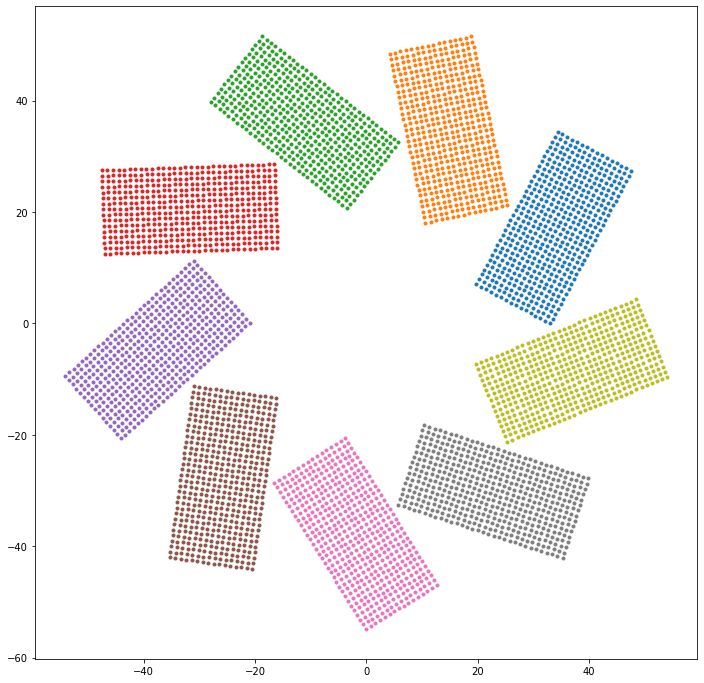

In [177]:
plt.figure(figsize=[12,12])
plt.gca().set_aspect(1.0)

panel_cnt = 0

for a in angles:
    panel_rot = rot_matrix(a, panel_trans)
    plot(panel_rot[0],panel_rot[1],".");
    panel_xvals_q = np.round(panel_rot[0]*32768).astype(int)
    panel_yvals_q = np.round(panel_rot[1]*32768).astype(int)

    print(f'int32_t panel{panel_cnt}[2][512] = {{' +  f' // panel{panel_cnt} begin')
    print("   // x values")
    print( to_c_array(panel_xvals_q.tolist(), ctype="int32_t" ) + ",")
    print("   // y values")
    print( to_c_array(panel_yvals_q.tolist(), ctype="int32_t" ) + "\n};" + f' // panel{panel_cnt} end\n')

    panel_cnt = panel_cnt + 1
    
    print(np.round(panel_rot[0:2]*32768).astype(int).tolist())